In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import itertools
import seaborn as sns
%matplotlib inline

# 1. Load the dataset data/data_banknote_authentication.txt and assign the following column names: "variance", "skewness", "curtosis", "entropy", "class"

In [51]:
banknote_authentication = pd.read_csv("../data/data_banknote_authentication.txt", sep=",", header=None)
banknote_authentication.columns = ["variance", "skewness","curtosis","entropy","class"]
banknote_authentication.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# 2. Plot in a bar chart the value distribution of the class column

<Axes: xlabel='class', ylabel='count'>

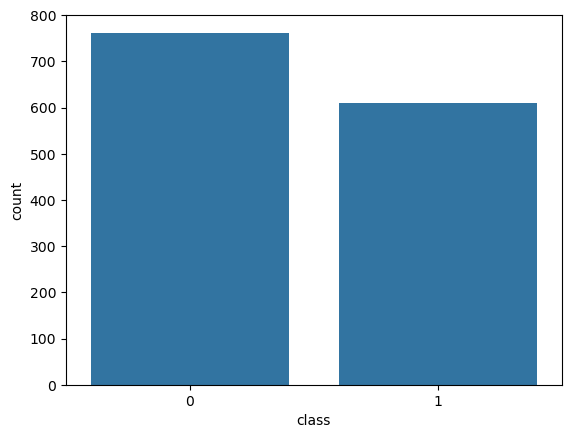

In [52]:
banknote_authentication['class'].value_counts() #to check if dataset is unbalanced
sns.countplot(banknote_authentication, x='class')

# 3. Split the dataset in train and test

In [53]:
X = banknote_authentication.iloc[:,0:4]
y = banknote_authentication.iloc[:,4]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# 4. Fit a LogisticRegression classifier

In [55]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

# 5. Compute and plot the confusion matrix

<Axes: >

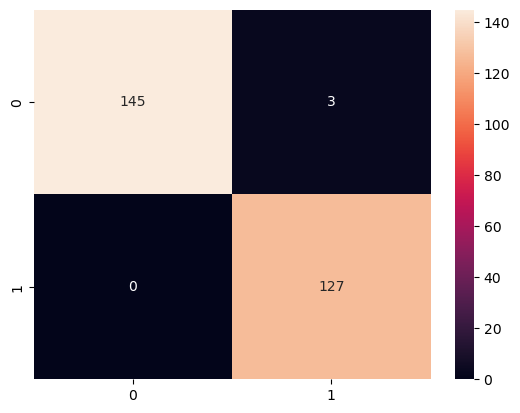

In [56]:
result = lr.predict(X_test)
confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

# 6. Extract TP, TN, FP and FN

In [57]:
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp = confusionmatrix[0,0]
fp = confusionmatrix[0,1]
fn = confusionmatrix[1,0]
tn = confusionmatrix[1,1]

# 7. Compute accuracy, precision, recall and f1 score

In [58]:
accuracy = accuracy_score(y_test, result)
print(f'Accuracy: {accuracy}')

precision = tp / (tp + fp)
print(f'Precision: {precision}')

recall = tp / (tp + fn)
print(f'Recall: {recall}')

f1 = precision_score(y_test,result)
print(f'F1 score: {f1}')

Accuracy: 0.9890909090909091
Precision: 0.9797297297297297
Recall: 1.0
F1 score: 0.9769230769230769


# 8. Plot ROC and precision-recall curves

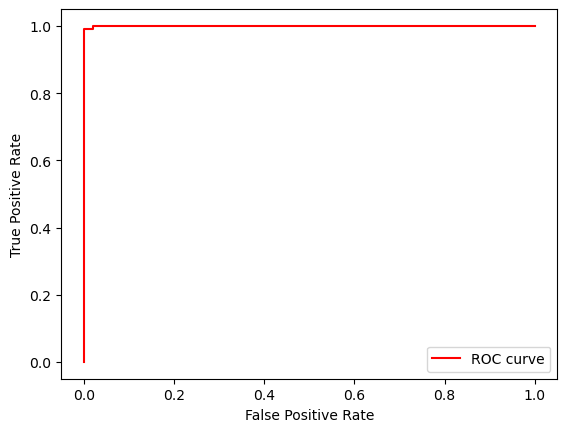

In [59]:
y_pred_proba = lr.predict_proba(X_test)[:,1] #probability estimation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr,'r-',label = 'ROC curve')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


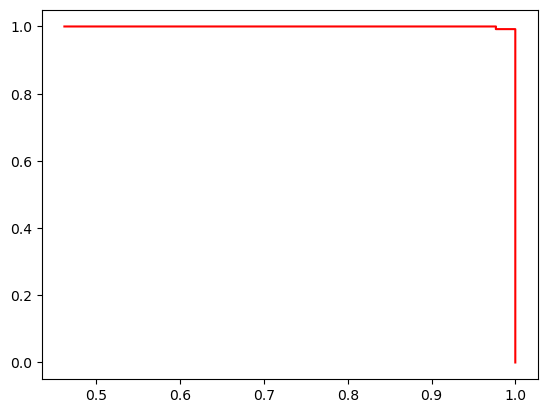

In [60]:
pr, rec, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(pr, rec,'r-',label = 'Precision-Recall Curve')

# 9. Train another classifier and compare the results

In [61]:
svm = SVC(C=0.6)
svm.fit(X_train,y_train)
result = svm.predict(X_test)

<Axes: >

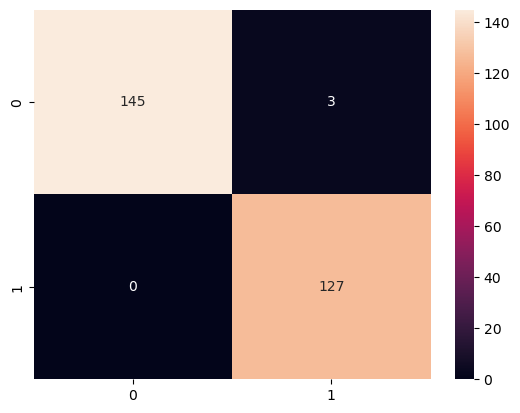

In [62]:
confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [63]:
tp = confusionmatrix[0,0]
fp = confusionmatrix[0,1]
fn = confusionmatrix[1,0]
tn = confusionmatrix[1,1]

In [64]:
accuracy = accuracy_score(y_test, result)
print(f'Accuracy: {accuracy}')

precision = tp / (tp + fp)
print(f'Precision: {precision}')

recall = tp / (tp + fn)
print(f'Recall: {recall}')

f1 = precision_score(y_test,result)
print(f'F1 score: {f1}')

Accuracy: 0.9890909090909091
Precision: 0.9797297297297297
Recall: 1.0
F1 score: 0.9769230769230769


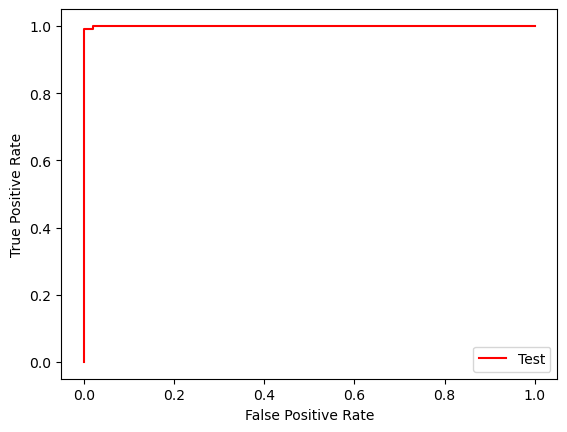

In [65]:
y_pred_proba = lr.predict_proba(X_test)[:,1] #probability estimation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr,'r-',label = 'Test')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

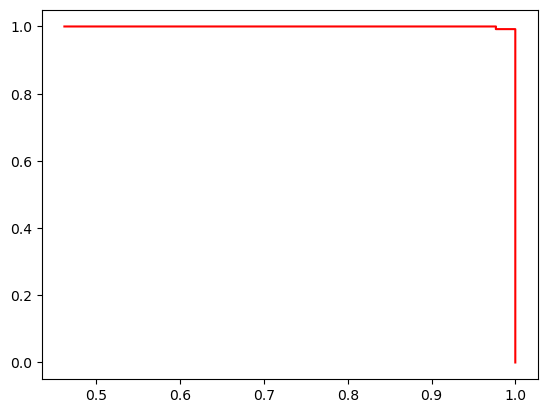

In [66]:
pr, rec, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(pr, rec,'r-',label = 'Test')